#### Create dataframe of all documents

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

import import_ipynb
from utilities import create_directory

# create a directory for data sets
create_directory("../data_sets")

data_sets_directory = "../data_sets"
documents_directory = "../news_data"
ids = list()
titles = list()
contents = list()
categories = list()

# for all directories
for directory in os.listdir(documents_directory):
    if os.path.isdir(f"{documents_directory}/{directory}/"):
        # for files in each directory
        for file in os.listdir(f"{documents_directory}/{directory}/"):
            if file.endswith(".txt"):
                ids.append(len(ids) + 1)
                f = open(f"{documents_directory}/{directory}/{file}")
                lines = f.readlines()
                titles.append(lines[0])
                content = ""
                for line in lines[1:]:
                    content = content + " " + line
                contents.append(content)
                categories.append(directory)

# create dataframe
data_set = pd.DataFrame(columns = ["id","title","content","category"])
data_set["id"] = ids
data_set["title"] = titles
data_set["content"] = contents
data_set["category"] = categories

# display dataframe
display(data_set.shape, data_set.head(5))

importing Jupyter notebook from utilities.ipynb


(2225, 4)

,id,title,content,category
0,1,Ad sales boost Time Warner profit\n,\n Quarterly profits at US media giant TimeWa...,business
1,2,Dollar gains on Greenspan speech\n,\n The dollar has hit its highest level again...,business
2,3,Yukos unit buyer faces loan claim\n,\n The owners of embattled Russian oil giant ...,business
3,4,High fuel prices hit BA's profits\n,\n British Airways has blamed high fuel price...,business
4,5,Pernod takeover talk lifts Domecq\n,\n Shares in UK drinks and food firm Allied D...,business


#### Display five random samples

In [2]:
data_set.sample(5, random_state = 0)

,id,title,content,category
384,385,Tate & Lyle boss bags top award\n,\n Tate & Lyle's chief executive has been nam...,business
1983,1984,Halo 2 sells five million copies\n,\n Microsoft is celebrating bumper sales of i...,tech
985,986,MSPs hear renewed climate warning\n,\n Climate change could be completely out of ...,politics
1386,1387,Pavey focuses on indoor success\n,\n Jo Pavey will miss January's View From Gre...,sport
1294,1295,Tories reject rethink on axed MP\n,\n Sacked MP Howard Flight's local Conservati...,politics


#### Distribution of each category

(5, 2)

,category,number_of_categories
0,business,510
1,entertainment,386
2,politics,417
3,sport,511
4,tech,401


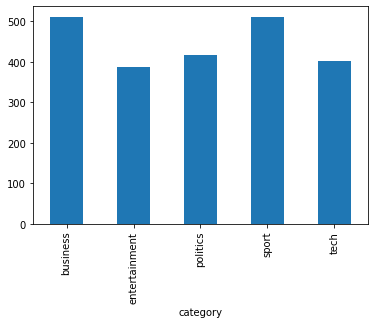

In [3]:
data_set_category = data_set.groupby("category").id.count()
data_set_category = data_set_category.reset_index()
data_set_category = data_set_category.rename(columns={"id":"number_of_categories"})
display(data_set_category.shape,data_set_category)

display(data_set.groupby("category").category.count().plot.bar(ylim = 0))

#### Split data set.

In [4]:
X = data_set.iloc[:,:-1].values
y = data_set.iloc[:,-1].values

# split data set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#### Create train and test dataframes

In [5]:
# create train dataframe
train_set = pd.DataFrame(X_train, columns = ["id","title","content"])
train_set["category"] = pd.DataFrame(y_train, columns = ["category"])
display(train_set.shape, train_set.head(5))

# create test dataframe
test_set = pd.DataFrame(X_test, columns = ["id","title","content"])
test_set["category"] = pd.DataFrame(y_test, columns = ["category"])
display(train_set.shape, test_set.head(5))

(1780, 4)

,id,title,content,category
0,842,Incredibles win animation awards\n,\n The Incredibles movie has beaten Shrek 2 t...,entertainment
1,1749,Hantuchova in Dubai last eight\n,\n Daniela Hantuchova moved into the quarter-...,sport
2,2119,More power to the people says HP\n,\n The digital revolution is focused on letti...,tech
3,1175,Amnesty chief laments war failure\n,\n The lack of public outrage about the war o...,politics
4,1503,SA return to Mauritius\n,\n Top seeds South Africa return to the scene...,sport


(1780, 4)

,id,title,content,category
0,385,Tate & Lyle boss bags top award\n,\n Tate & Lyle's chief executive has been nam...,business
1,1984,Halo 2 sells five million copies\n,\n Microsoft is celebrating bumper sales of i...,tech
2,986,MSPs hear renewed climate warning\n,\n Climate change could be completely out of ...,politics
3,1387,Pavey focuses on indoor success\n,\n Jo Pavey will miss January's View From Gre...,sport
4,1295,Tories reject rethink on axed MP\n,\n Sacked MP Howard Flight's local Conservati...,politics


#### Display train distribution of each category

(5, 2)

,category,number_of_categories
0,business,399
1,entertainment,312
2,politics,331
3,sport,403
4,tech,335


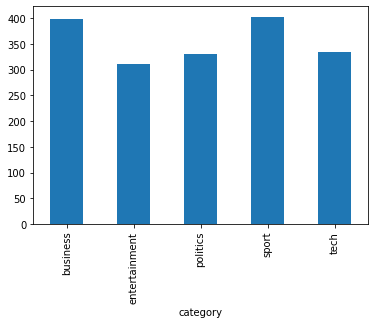

In [6]:
train_set_category = train_set.groupby("category").id.count()
train_set_category = train_set_category.reset_index()
train_set_category = train_set_category.rename(columns={"id":"number_of_categories"})
display(train_set_category.shape,train_set_category)

display(train_set.groupby("category").category.count().plot.bar(ylim=0))

#### Display test distribution of each category

(5, 2)

,category,number_of_categories
0,business,111
1,entertainment,74
2,politics,86
3,sport,108
4,tech,66


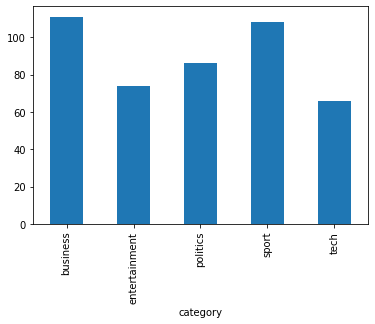

In [7]:
test_set_category = test_set.groupby("category").id.count()
test_set_category = test_set_category.reset_index()
test_set_category = test_set_category.rename(columns={"id":"number_of_categories"})
display(test_set_category.shape,test_set_category)

display(test_set.groupby("category").category.count().plot.bar(ylim = 0))

#### Save dataframes to .tsv files

In [8]:
# create data_set.tsv, train_set.tsv and test_set.tsv
data_set.to_csv(f"{data_sets_directory}/data_set.tsv", sep="\t", index=False)
train_set.to_csv(f"{data_sets_directory}/train_set.tsv", sep="\t", index=False, columns = ["id","title","content","category"])
test_set.to_csv(f"{data_sets_directory}/test_set.tsv", sep="\t", index=False, columns = ["id","title","content"])
test_set.to_csv(f"{data_sets_directory}/test_set_categories.tsv", sep="\t", index=False, columns = ["category"])